In [10]:
import pandas as pd
import numpy as np 
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt 
import os 

### Load Data file

In [11]:
#list all file names 
os.listdir()

['Texas Data Project.ipynb',
 'TX_CD29_BizNotes.csv',
 'TX_CD29_Biz.csv',
 'Texas_District_29.csv',
 'Texas_CD29.csv',
 'Texas_CD29_Notes.csv',
 '.ipynb_checkpoints']

In [36]:
tx_cd29 = pd.read_csv('Texas_District_29.csv')
tx_cd29.head()

In [34]:
#Unique Topics
tx_cd29.Topic.unique()

array(['People', 'Workers', 'Housing', 'Socioeconomic', 'Education'],
      dtype=object)

In [ ]:
#df for each 
ppl = tx_cd29[tx_cd29['Topic']=='People']
wrkers = tx_cd29[tx_cd29['Topic']=='Workers']
housing = tx_cd29[tx_cd29['Topic']=='Housing']
socioec = tx_cd29[tx_cd29['Topic']=='Socioeconomic']
ed = tx_cd29[tx_cd29['Topic']=='Education']

array(['Sex and Age', 'Race', 'Hispanic or Latino and Race',
       'Place of Birth', 'Ancestry', 'Veteran Status',
       'Disability Status of the Civilian Noninstitutionalized Population',
       'Residence 1 Year Ago'], dtype=object)

In [32]:
#Notes for Datafile 
tx_cd29_notes = pd.read_csv('Texas_CD29_Notes.csv')
#pd.set_option('display.max_colwidth', None)
notes = tx_cd29_notes.Notes.astype(str)
# Join the text Series into a single string
#notes = ' '.join(notes)
li_notes = list(notes)

for note in li_notes: 
    print(note)

Source: 2021 American Community Survey 1-Year Estimates
Estimates in the People, Workers, Housing, Socioeconomic, and Education tabs are from the American Community Survey (ACS). The ACS is an annual household survey developed by the U.S. Census Bureau to replace the long form of the decennial census program. Each year, the ACS samples about 3.5 million household addresses to produce nearly 11 billion estimates covering demographic, social, economic, and housing characteristics.
Except where noted, 'race' refers to people reporting only one race.  'Hispanic' refers to an ethnic category;  Hispanics may be of any race.
An '**' entry in the margin of error column indicates that either no sample observations or too few sample observations were available to compute a standard error and thus the margin of error. A statistical test is not appropriate.
An '-' entry in the estimate column indicates that either no sample observations or too few sample observations were available to compute an e

### People 

In [41]:
#subjects in people 
ppl.Subject.unique()

array(['Sex and Age', 'Race', 'Hispanic or Latino and Race',
       'Place of Birth', 'Ancestry', 'Veteran Status',
       'Disability Status of the Civilian Noninstitutionalized Population',
       'Residence 1 Year Ago'], dtype=object)

In [117]:
#look at just hispanic 
hispanic = ppl[ppl['Subject'] == 'Hispanic or Latino and Race']
hispanic['District 29 Estimate'] = hispanic['District 29 Estimate'].apply(lambda x: int(x.replace(',', '')))
variables = ['Mexican','Puerto Rican', 'Cuban', 'Other Hispanic or Latino']
hispanic[hispanic['Title'] == 'Total population'] 
#var = hispanic[hispanic['Title'] == 'Not Hispanic or Latino']['District 29 Estimate']
#740023 - 189176

/var/folders/vv/15vmsdzj0d9c0x2z42fx60fr0000gn/T/ipykernel_82241/1640420467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hispanic['District 29 Estimate'] = hispanic['District 29 Estimate'].apply(lambda x: int(x.replace(',', '')))


550847

In [128]:
#checking numbers 
just_hisp = hispanic.query("Title in ['Mexican','Puerto Rican', 'Cuban', 'Other Hispanic or Latino']")
just_hisp.astype({'District 29 Estimate': 'int'}).dtypes
just_hisp_num = just_hisp['District 29 Estimate'].sum()
just_hisp_num

550847

/var/folders/vv/15vmsdzj0d9c0x2z42fx60fr0000gn/T/ipykernel_82241/2872073221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_hisp['perc'] = just_hisp['District 29 Estimate']/just_hisp['District 29 Estimate'].sum()


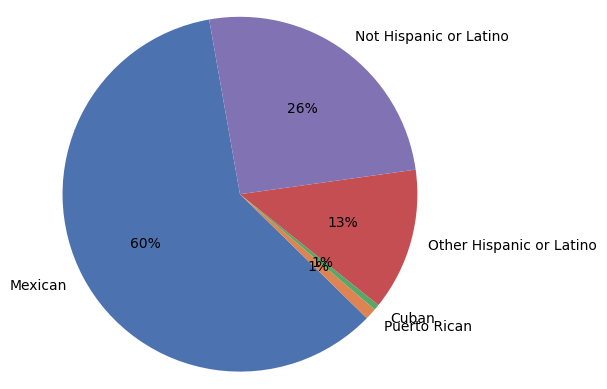

In [133]:
just_hisp = hispanic.query("Title in ['Mexican','Puerto Rican', 'Cuban', 'Other Hispanic or Latino', 'Not Hispanic or Latino']")
just_hisp['perc'] = just_hisp['District 29 Estimate']/just_hisp['District 29 Estimate'].sum()
#sns.barplot(x='Title',y='District 29 Estimate', data = just_hisp)
#plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
data = just_hisp['District 29 Estimate']
labels = just_hisp['Title']
colors = sns.color_palette('deep')[0:5]
plt.pie(data, labels = labels, colors = colors,startangle=100, radius=1.2, autopct='%.0f%%')
plt.show()

In [87]:
hispanic = ppl[ppl['Subject'] == 'Hispanic or Latino and Race']
hispanic

,Topic,Subject,Title,District 29 Estimate,District 29 MOE
28,People,Hispanic or Latino and Race,Total population,"740,023","(+/-26,720)"
29,People,Hispanic or Latino and Race,Hispanic or Latino (of any race),"550,847","(+/-24,754)"
30,People,Hispanic or Latino and Race,Mexican,"443,308","(+/-24,871)"
31,People,Hispanic or Latino and Race,Puerto Rican,"7,775","(+/-4,694)"
32,People,Hispanic or Latino and Race,Cuban,"3,882","(+/-2,104)"
33,People,Hispanic or Latino and Race,Other Hispanic or Latino,"95,882","(+/-13,396)"
34,People,Hispanic or Latino and Race,Not Hispanic or Latino,"189,176","(+/-16,208)"
